<a href="https://colab.research.google.com/github/Krishnaugale353/Pnemonia-Detection-using-ML/blob/main/Pnemonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu


In [2]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob


In [3]:
IMAGESHAPE = [224, 224, 3]
training_data = '/content/drive/MyDrive/chest_xray/train'
testing_data = "/content/drive/MyDrive/chest_xray/test"


In [4]:
!nvidia-smi

Fri Mar  8 13:43:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [6]:
for each_layer in vgg_model.layers:
	each_layer.trainable = False


In [7]:
classes = glob('/content/drive/MyDrive/chest_xray/test/*')


In [8]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)


In [9]:
final_model = Model(inputs=vgg_model.input, outputs=prediction)
final_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
final_model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
								shear_range = 0.2,
								zoom_range = 0.2,
								horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1. / 255)


In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
												target_size = (224, 224),
												batch_size = 6,
												class_mode = 'categorical')


Found 5218 images belonging to 2 classes.


In [13]:
test_set = testing_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
											target_size = (224, 224),
											batch_size = 6,
											class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [14]:
print("Size of the training dataset:", len(training_set))
print("Size of the testing dataset:", len(test_set))

Size of the training dataset: 870
Size of the testing dataset: 104


In [15]:
fitted_model = final_model.fit_generator(
training_set,
validation_data=test_set,
epochs=5,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)


<ipython-input-15-0133b02f9370>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model = final_model.fit_generator(


Epoch 1/5
870/870 [==============================] - 767s 873ms/step - loss: 0.2621 - accuracy: 0.9224 - val_loss: 0.4213 - val_accuracy: 0.9071
Epoch 2/5
870/870 [==============================] - 139s 160ms/step - loss: 0.2324 - accuracy: 0.9437 - val_loss: 0.7915 - val_accuracy: 0.8510
Epoch 3/5
870/870 [==============================] - 140s 161ms/step - loss: 0.1789 - accuracy: 0.9550 - val_loss: 0.4838 - val_accuracy: 0.9071
Epoch 4/5
870/870 [==============================] - 137s 158ms/step - loss: 0.2134 - accuracy: 0.9509 - val_loss: 0.8676 - val_accuracy: 0.8846
Epoch 5/5
870/870 [==============================] - 137s 158ms/step - loss: 0.1417 - accuracy: 0.9649 - val_loss: 0.5539 - val_accuracy: 0.9151


In [16]:
final_model.save('/content/drive/MyDrive/chest_xray/our_modell.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 655.0 kB/s eta 0:00:00


In [19]:
from keras_preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('/content/drive/MyDrive/chest_xray/our_modell.h5') #Loading our model
img=image.load_img('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg',target_size=(224,224))
imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]: #Printing the prediction of model.
	print('Person is safe.')
else:
	print('Person is affected with Pneumonia.')
print(f'Predictions: {prediction}')


1/1 [==============================] - 1s 1s/step
Person is safe.
Predictions: [[9.9999654e-01 3.4119848e-06]]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix


# Evaluate the model on the testing set
evaluation = final_model.evaluate(test_set, steps=len(test_set))

# Print overall accuracy
print("Testing Accuracy: {:.2f}%".format(evaluation[1] * 100))

# Make predictions on the test set
predictions = final_model.predict(test_set, steps=len(test_set))

# Convert predictions to binary values (0 or 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_set.classes

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_classes, predicted_classes)
classification_rep = classification_report(true_classes, predicted_classes, target_names=classes)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)


104/104 [==============================] - 16s 149ms/step - loss: 0.5539 - accuracy: 0.9151
Testing Accuracy: 91.51%
104/104 [==============================] - 9s 80ms/step

Confusion Matrix:
[[ 67 167]
 [150 240]]

Classification Report:
                                                  precision    recall  f1-score   support

   /content/drive/MyDrive/chest_xray/test/NORMAL       0.31      0.29      0.30       234
/content/drive/MyDrive/chest_xray/test/PNEUMONIA       0.59      0.62      0.60       390

                                        accuracy                           0.49       624
                                       macro avg       0.45      0.45      0.45       624
                                    weighted avg       0.48      0.49      0.49       624



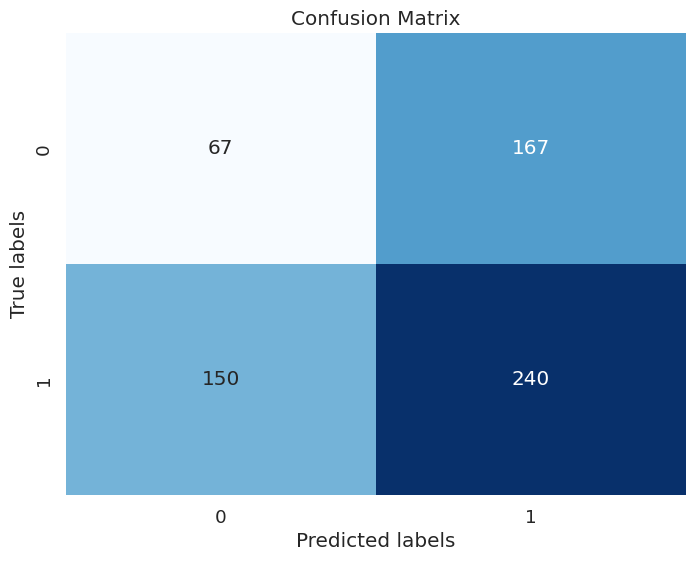

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

104/104 [==============================] - 15s 142ms/step


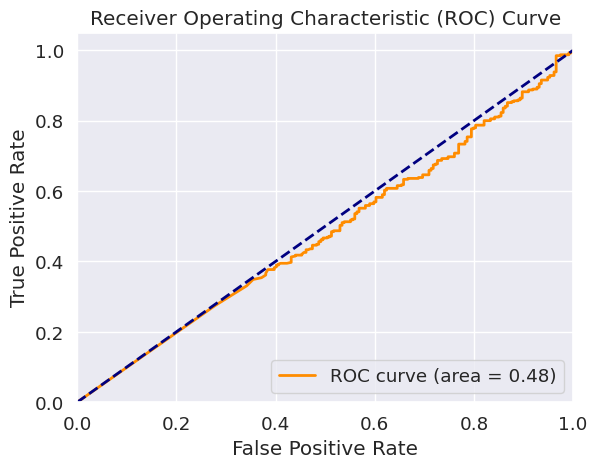

In [25]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the 'PNEUMONIA' class
predicted_probabilities = final_model.predict(test_set, steps=len(test_set))[:, 1]

# Get true labels
true_labels = test_set.classes

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have the training_set and test_set from your CNN code

# Extract images and labels from the training set
train_images, train_labels = training_set.next()

# Reshape the data
train_images_flattened = train_images.reshape(train_images.shape[0], -1)

# Create and train the binary SVM model for normal vs. pneumonia
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=2))
svm_model.fit(train_images_flattened, np.argmax(train_labels, axis=1))

# Evaluate the model on the testing set
test_images, test_labels = test_set.next()
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

predictions_svm = svm_model.predict(test_images_flattened)

# Print confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(np.argmax(test_labels, axis=1), predictions_svm)
classification_rep_svm = classification_report(np.argmax(test_labels, axis=1), predictions_svm)

print("\nSVM - Confusion Matrix:")
print(conf_matrix_svm)

print("\nSVM - Classification Report:")
print(classification_rep_svm)


SVM - Confusion Matrix:
[[3 0]
 [1 2]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize empty lists to store images and labels
train_images_flattened = []
train_labels = []

# Loop through all batches in the training set and extract images and labels
for images_batch, labels_batch in training_set:
    # Flatten and append images
    train_images_flattened.extend(images_batch.reshape(images_batch.shape[0], -1))
    # Append labels
    train_labels.extend(labels_batch)

# Break the loop after iterating through all images
if len(train_images_flattened) == len(training_set.filenames):
    break

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images_flattened, train_labels, test_size=0.2, random_state=42)


In [ ]:
# Create and train the binary SVM model for normal vs. pneumonia
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=2))
svm_model.fit(X_train, y_train)

In [ ]:
# Evaluate on the validation set
predictions_val = svm_model.predict(X_val)
conf_matrix_val = confusion_matrix(y_val, predictions_val)
classification_rep_val = classification_report(y_val, predictions_val)

print("\nSVM Validation - Confusion Matrix:")
print(conf_matrix_val)

print("\nSVM Validation - Classification Report:")
print(classification_rep_val)

# Optional: Evaluate on the testing set (if provided)
if test_set:
    test_images, test_labels = test_set.images, test_set.labels
    test_images_flattened = test_images.reshape(test_images.shape[0], -1)
    predictions_svm = svm_model.predict(test_images_flattened)

    conf_matrix_svm = confusion_matrix(test_labels, predictions_svm)
    classification_rep_svm = classification_report(test_labels, predictions_svm)

    print("\nSVM - Confusion Matrix:")
    print(conf_matrix_svm)

    print("\nSVM - Classification Report:")
    print(classification_rep_svm)